In [2]:
#ensure that matplotlib plots inline
%matplotlib inline

import os
import numpy as np
import mvpa2
import nibabel
import pickle
import gzip
from mvpa2.suite import *
#from scipy.signal import resample

In [3]:
# get the location of the files
bold_fname = os.path.join('..', 'data', 'qub', '4Dw.nii')
mask_fname = os.path.join('..', 'data', 'qub', 'struct', 'final_mask_w.hdr')

In [4]:
# create a pymvpa fmri dataset object
original_dataset = fmri_dataset(bold_fname, mask=mask_fname)

In [5]:
#get the trajectory
with open('..\\data\\story\\smoothedTrajectoriesDifferentWindowSizes\\smoothTrajRawValenceMean_win200.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    original_trajectory = u.load()

In [6]:
#downsample the trajectory to fit match the number of fMRI sample
resampled_trajectory = resample(original_trajectory, len(original_dataset.samples))

# Classification time

In [7]:
# set up the classifier
classifier = kNN(k=3, dfx=one_minus_correlation, voting='majority')

In [8]:
original_dataset.sa['targets'] = resampled_trajectory

In [9]:
#new size
new_ds = original_dataset[100*-1 : ]

In [23]:
other_new_ds = original_dataset[ : 100]

In [10]:
new_ds.shape

(100, 65159)

In [12]:
classifier.train(new_ds)

In [24]:
#predict against itself
small_predictions = classifier.predict(other_new_ds.samples)

In [25]:
np.mean(small_predictions == new_ds.sa.targets)

0.029999999999999999

In [26]:
#small_predictions

In [27]:
#new_ds.sa.targets

In [28]:
import matplotlib.pyplot as plt

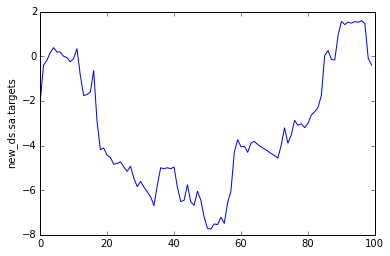

In [29]:
plt.plot(new_ds.sa.targets)
plt.ylabel('new_ds.sa.targets')
plt.show()

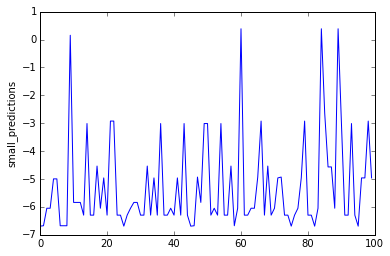

In [30]:
plt.plot(small_predictions)
plt.ylabel('small_predictions')
plt.show()